1. Keep h, m0, i2 dimensions, and i1 hmdr fixed. Then observe the 3 variables (h-d0, h-d1, radwidth).
2. Fix the right uncovered ratio and (h-d0)/radwidth, then vary the other stuff (through "good" values).

If AM dependence is solely dependent on the right uncovered ratio and (h-d0)/radwidth, find that relation. If not, identify what else is there.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from scipy import stats


In [2]:
def swap_vals(prob, d, a):
  # Avoids mk recomputations.
  prob.d = d
  prob.a = a
  prob.scale = a
  return prob

def random_m0(h):
  # need m0 * h < 40
  return random.uniform(low=0.0, high=(40/h))

In [3]:
file1 = "predetermined_1.pkl"
file2 = "predetermined_2.pkl"

h = 30
m0 = 1
right_ratios = list(np.linspace(0.05, 0.9, 18)) + list(np.linspace(0.91, 1, 10)) + list(np.linspace(1.01, 1.05, 5)) + list(np.linspace(1.1, 2.95, 38))
hmdrs = list(np.linspace(1, 20, 20))

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [1, 0, 0]
rho = 1023

def populate_d_a(h, rr, hmdr):
  hmd0 = 10 # 20
  hmd1 = rr * hmd0
  hmd2 = 15
  radwidth0 = hmd0/hmdr
  radwidth1 = hmd1/3
  radwidth2 = 5
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  return d, a


# all_prob_dicts = []
# prob = ConvergenceProblemI(h, [1,1,1], [1,2,3], heaving, NMK, m0, rho)
# mk = prob.m_k
# for rr in right_ratios:
#   for hmdr in hmdrs:
#     d, a = populate_d_a(h, rr, hmdr)
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 0,
#             "m0s" : [m0]}
#     swap_vals(prob, d, a)
#     print(info)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     all_prob_dicts.append(data_dict)
#   update_data_file(all_prob_dicts, file2)
#   print(f"Finished rr = {rr:.3g}.")

In [4]:
# Extract data and add convergence metrics to the dictionaries
all_prob_dicts = open_pkl_file(file2)
generate_convergence_data(all_prob_dicts, [0.01, 0.005])
log_data = generate_log_data(all_prob_dicts)

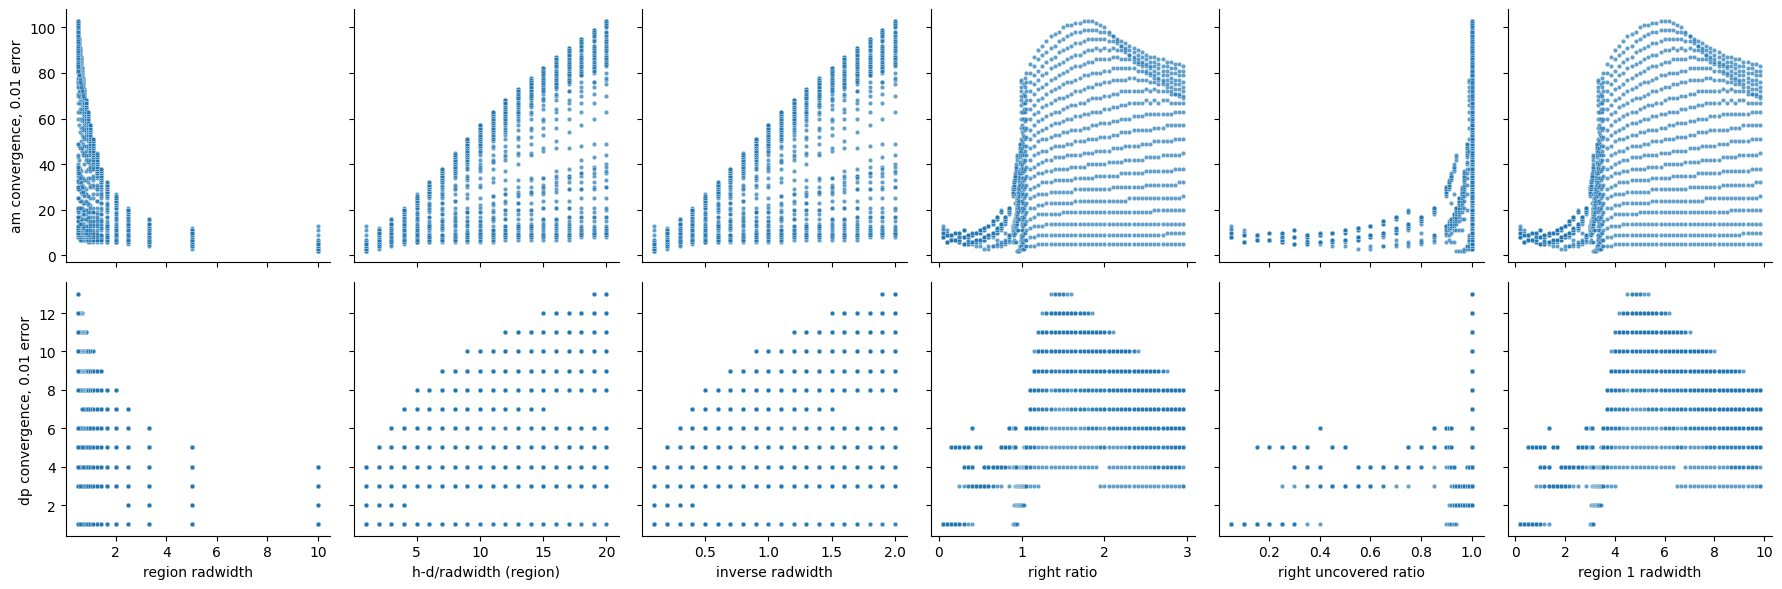

In [5]:
# Plot convergence point on y, variable combo on x.
def xf1(config, m0):
  return config["h"]

def xf2(config, m0):
  return m0

def xf3(config, m0):
  return m0 * config["h"]

def xf4(config, m0):
  return (config["a"][-1])

def xf5(config, m0):
  return (config["h"] - config["d"][config["region"]])

def xf6(config, m0):
  region = config["region"]
  if region == 0:
    return config["a"][region]
  else:
    return config["a"][region] - config["a"][region - 1]
  
def xf7(config, m0):
  return config["a"][-1] - config["a"][-2]

def xf8(config, m0):
  radwidth = xf6(config, m0)
  return (config["h"] - config["d"][config["region"]])/radwidth

def xf9(config, m0):
  radwidth = xf7(config, m0)
  return (config["h"] - config["d"][-1])/radwidth

def xf10(config, m0):
  return (config["h"] - config["d"][-1])/(config["h"])

def xf11(config, m0):
  return (config["h"] - config["d"][-1]) * m0

def xf12(config, m0):
  radwidth = xf6(config, m0)
  return 1/radwidth

def xf13(config, m0):
  return 1/((config["h"] - config["d"][config["region"]])/(config["h"] - config["d"][config["region"] + 1]))

def xf14(config, m0):
  region = config["region"]
  right_fluid_height = config["h"] if region == 2 else (config["h"] - config["d"][region + 1])
  self_fluid_height = (config["h"] - config["d"][region])
  if right_fluid_height < self_fluid_height:
    return right_fluid_height/self_fluid_height
  else:
    return 1
  
def xf15(config, m0):
  return config["a"][1] - config["a"][0]

def yf1(config, m0):
  return config[m0]["convergence point 0.01 am"]

def yf2(config, m0):
  return config[m0]["convergence point 0.005 am"]

def yf3(config, m0):
  return config[m0]["convergence point 0.01 dp"]

def yf4(config, m0):
  return config[m0]["convergence point 0.005 dp"]

x_funcs = {# "h" : xf1,
           # "m0" : xf2,
           # "m0h" : xf3,
           # "maxrad" : xf4,
           # "h - d" : xf5,
           "region radwidth" : xf6,
           # "outermost radwidth" : xf7,
           "h-d/radwidth (region)" : xf8,
           # "h-d/radwidth (outermost)" : xf9,
           # "h-d/h (outermost)" : xf10,
           # "m0 * (h-d) (outermost)" : xf11,
           "inverse radwidth" : xf12,
           "right ratio" : xf13,
           "right uncovered ratio" : xf14,
           "region 1 radwidth" : xf15}
y_funcs = {"am convergence, 0.01 error" : yf1,
          #  "am convergence, 0.005 error" : yf2,
           "dp convergence, 0.01 error" : yf3,
          #  "dp convergence, 0.005 error" : yf4
           }

plot_relation_grid(all_prob_dicts, x_funcs, y_funcs)

In [6]:
# variable metrics
def h_minus_d_over_radwidth(data_dict):
    region = data_dict["region"]
    radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
    return (data_dict["h"] - data_dict["d"][region])/radwidth

def tall_theta(data_dict):
  hmdr = h_minus_d_over_radwidth(data_dict)
  return np.arctan(1/hmdr)

def right_ratio(data_dict):
    return (data_dict["h"] - data_dict["d"][data_dict["region"]])/(data_dict["h"] - data_dict["d"][data_dict["region"] + 1])
    
def right_uncovered_ratio(data_dict, over = True): # Fraction of right boundary with imperfect BC
    region = data_dict["region"]
    right_fluid_height = data_dict["h"] if region == 2 else (data_dict["h"] - data_dict["d"][region + 1])
    self_fluid_height = (data_dict["h"] - data_dict["d"][region])
    if (right_fluid_height < self_fluid_height) or over:
      return right_fluid_height/self_fluid_height
    else:
      return 1

In [7]:
def plot_right_uncovered_and_hmdr(data):
  plot_hydros_against_2(data, "am", 0.01,
                        lambda data_dict, m0 : right_uncovered_ratio(data_dict, over = False),
                        lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                        "right uncovered ratio", "(h-d)/radwidth")
  plot_hydros_against_2(data, "dp", 0.01,
                        lambda data_dict, m0 : right_uncovered_ratio(data_dict, over = False),
                        lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                        "right uncovered ratio", "(h-d)/radwidth")
  plot_hydros_against_2(data, "am", 0.01,
                        lambda data_dict, m0 : right_uncovered_ratio(data_dict),
                        lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                        "right uncovered ratio", "(h-d)/radwidth")
  plot_hydros_against_2(data, "dp", 0.01,
                        lambda data_dict, m0 : right_uncovered_ratio(data_dict),
                        lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                        "right uncovered ratio", "(h-d)/radwidth")

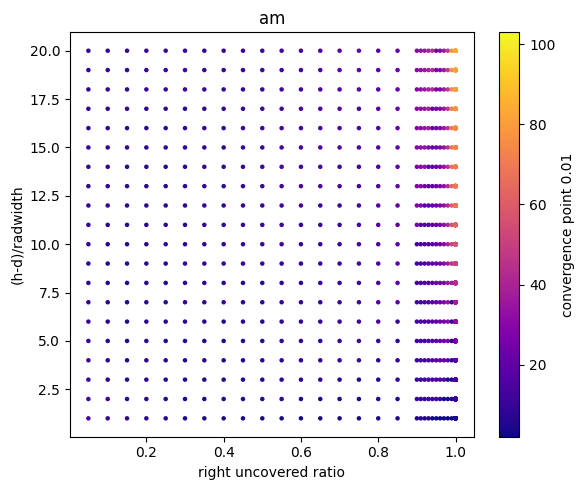

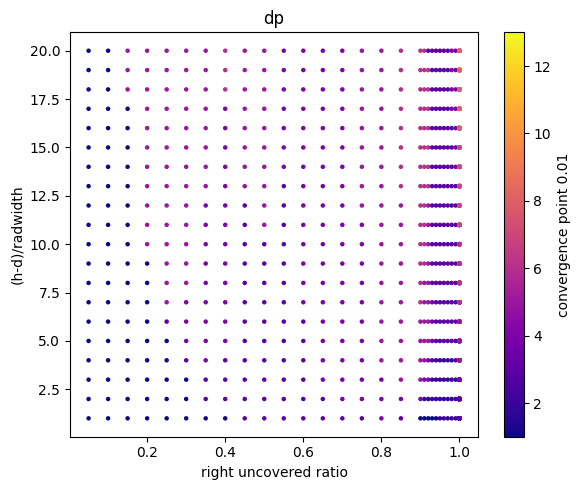

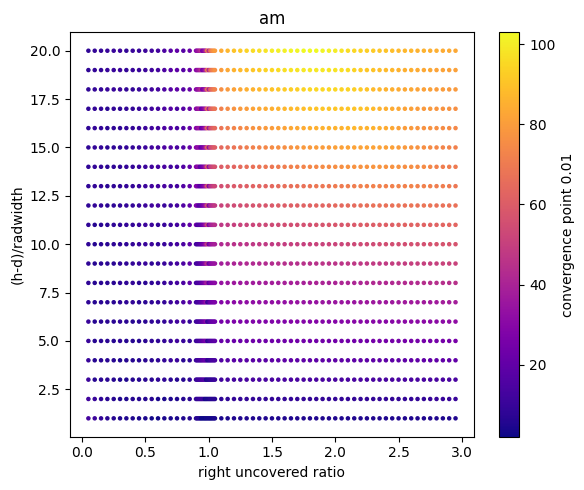

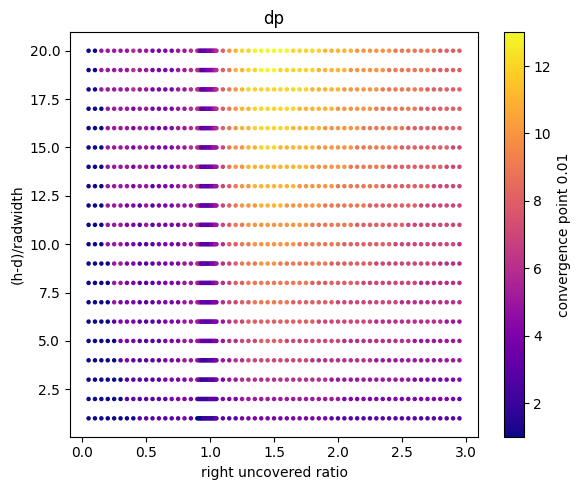

In [8]:
plot_right_uncovered_and_hmdr(all_prob_dicts)

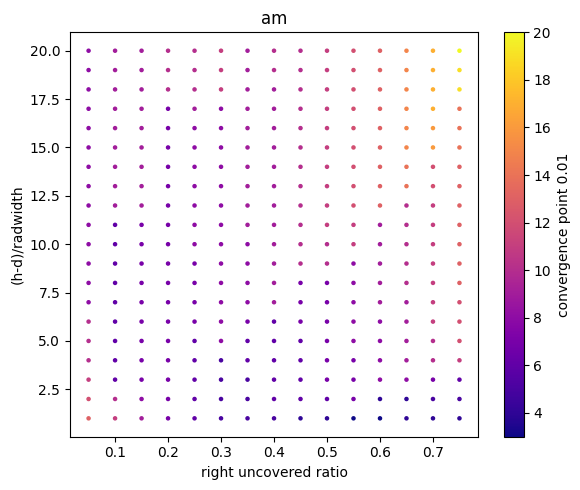

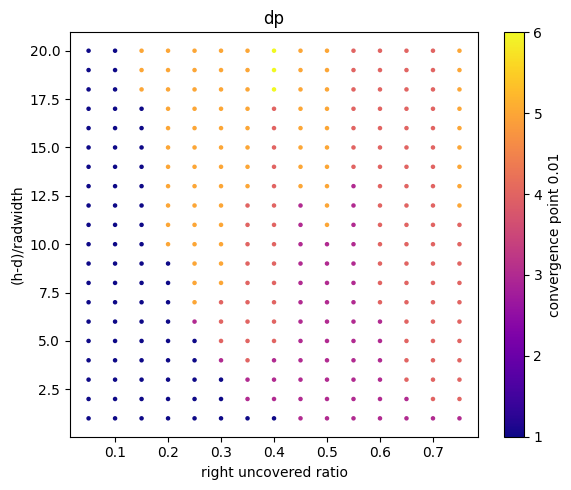

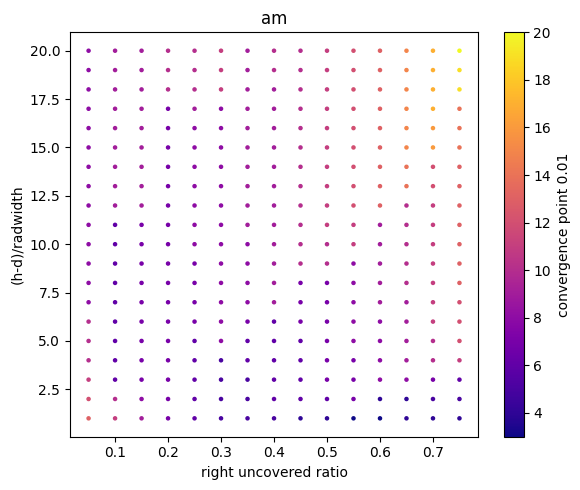

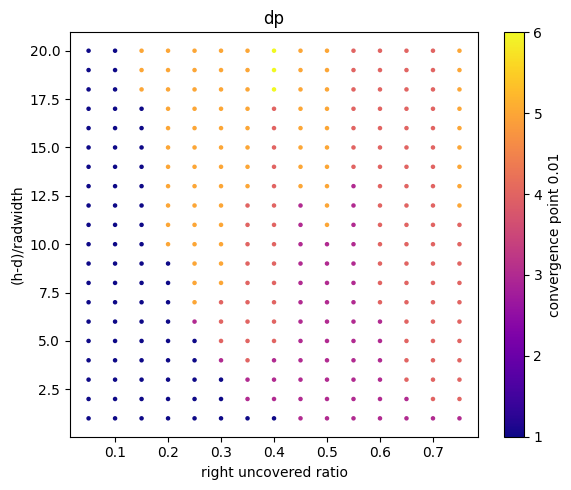

In [9]:
subset = [prob for prob in all_prob_dicts if right_uncovered_ratio(prob) < 0.8]
plot_right_uncovered_and_hmdr(subset)

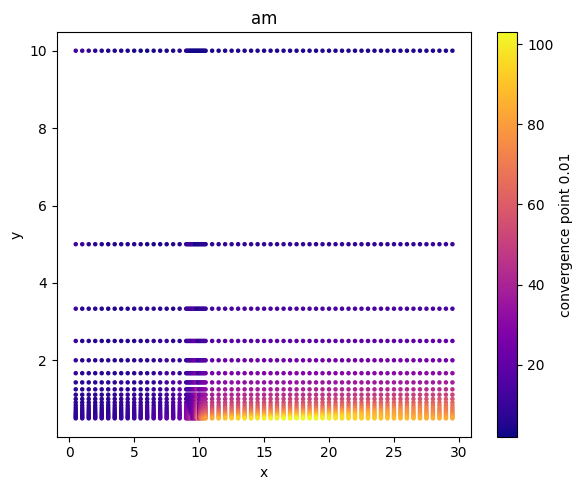

In [10]:
plot_hydros_against_2(all_prob_dicts, "am", 0.01,
                      lambda data_dict, m0 : data_dict["h"] - data_dict["d"][1],
                      lambda data_dict, m0 : data_dict["a"][0],
                      "x", "y")

In [11]:
def plot_wrt_one(data, hydro, error, scale = False, plot_by = "hmdr", m0 = 1, func_pack = None):
  hmd1s = []
  radwidths = []
  for data_dict in data:
    radwidth = data_dict["a"][0]
    hmd1 = data_dict["h"] - data_dict["d"][1]
    if radwidth not in radwidths:
      radwidths.append(radwidth)
    if hmd1 not in hmd1s:
      hmd1s.append(hmd1)

  if plot_by == "hmdr":
    categories = hmd1s
    lab_func = lambda data_dict : data_dict["h"] - data_dict["d"][1]
    entry_func = lambda data_dict : h_minus_d_over_radwidth(data_dict)
    series_lab_func = lambda lab : f"rur = {lab/10 : .4g}" #20
    colorbar_lab = "right uncovered ratio"
    scaled_cat = scale_by(categories, 20)
    xlab = "(h-d)/radwidth"
  elif plot_by == "right uncovered ratio":
    categories = radwidths
    lab_func = lambda data_dict : data_dict["a"][0]
    entry_func = lambda data_dict : right_uncovered_ratio(data_dict, over = True)
    series_lab_func = lambda lab : f"hmdr = {20/lab : .4g}"
    colorbar_lab = "(h-d)/radwidth"
    scaled_cat = [10/cat for cat in categories] # 20
    xlab = "(h-d1)/(h-d0)"
  else:
    raise ValueError("Invalid plot_by argument.")
  
  if func_pack is not None: # Plotting a prediction on the x-axis instead
    entry_func = func_pack["function"]
    xlab = func_pack["xlab"]
  
  plotting_data = {lab : [] for lab in categories}
  for data_dict in data:
    lab = lab_func(data_dict)
    plotting_data[lab].append((entry_func(data_dict), data_dict[m0][f"convergence point {error:.2g} " + hydro]))

  norm = Normalize(vmin=min(scaled_cat), vmax=max(scaled_cat))
  cmap = plt.get_cmap('viridis')
  sm = ScalarMappable(norm=norm, cmap=cmap)
  colors = sm.to_rgba(scaled_cat)
  
  fig, ax = plt.subplots()
  for idx, lab in enumerate(categories):
    plotting_data[lab].sort(key = lambda tup : tup[0])
    xs = [x for x, _ in plotting_data[lab]]
    ys = [y for _, y in plotting_data[lab]]
    if scale:
      ys = scale_by(ys, ys[0])
    plt.plot(xs, ys, color = colors[idx], label = series_lab_func(lab))
  

  ax.set_xlabel(xlab)
  if scale:
    ylab = "Ratio of NMK at convergence to that for 1st config"
  else:
    ylab = "NMK at convergence"
  ax.set_ylabel(ylab)
  ax.set_title(hydro + " convergence wrt " + xlab)

  # now attach a colorbar to THAT axes
  cbar = fig.colorbar(sm, ax=ax)
  cbar.set_label(colorbar_lab)
  plt.show()

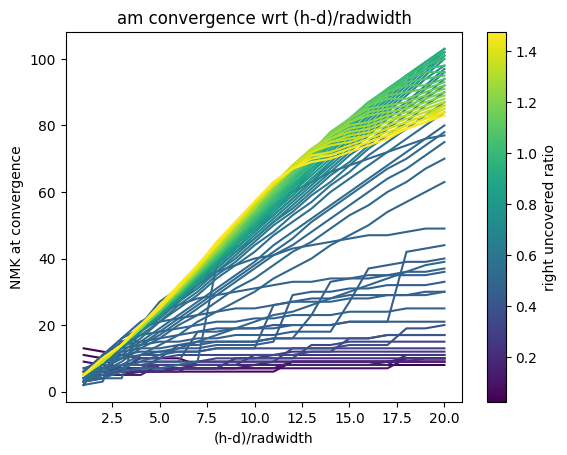

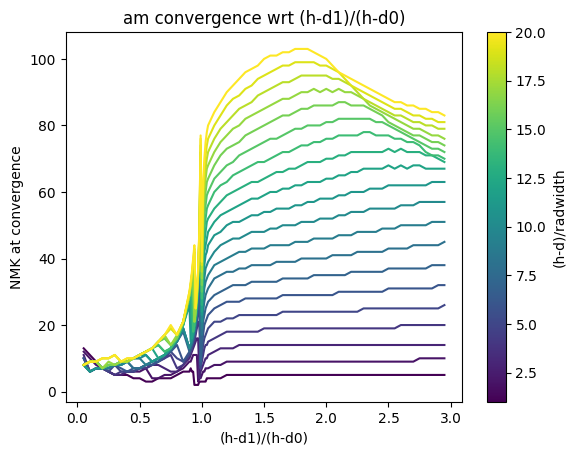

In [18]:
plot_wrt_one(all_prob_dicts, "am", 0.01, plot_by = "hmdr")
plot_wrt_one(all_prob_dicts, "am", 0.01, plot_by = "right uncovered ratio")
# plot_wrt_one(all_prob_dicts, "am", 0.01, plot_by = "hmdr", scale = True)
# plot_wrt_one(all_prob_dicts, "am", 0.01, plot_by = "right uncovered ratio", scale = True)

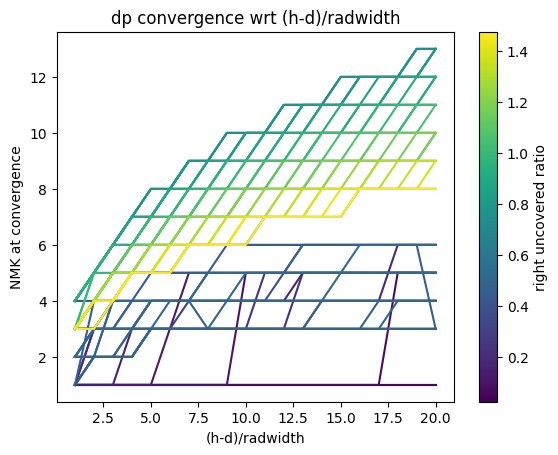

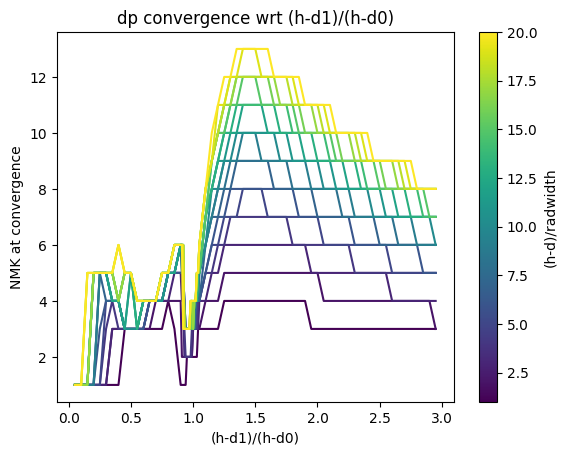

In [19]:
plot_wrt_one(all_prob_dicts, "dp", 0.01, plot_by = "hmdr")
plot_wrt_one(all_prob_dicts, "dp", 0.01, plot_by = "right uncovered ratio")
# plot_wrt_one(all_prob_dicts, "dp", 0.01, plot_by = "hmdr", scale = True)
# plot_wrt_one(all_prob_dicts, "dp", 0.01, plot_by = "right uncovered ratio", scale = True)

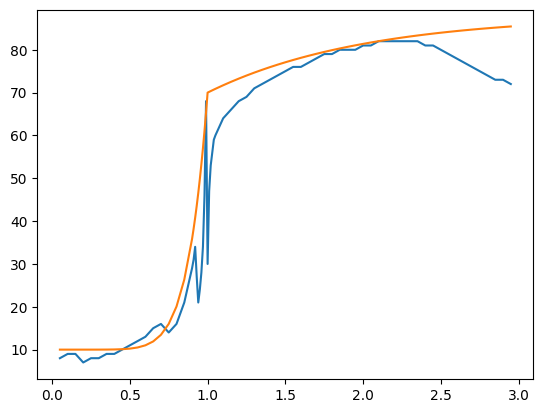

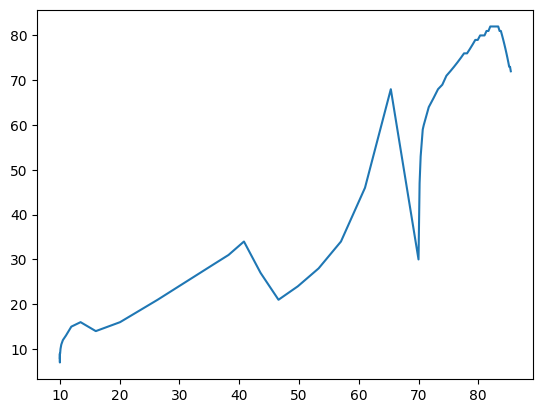

In [14]:
def guess(prob):
  rr = right_uncovered_ratio(prob)
  if rr < 1:
    return rr ** 8
  else:
    return 0.3 * (1 - np.exp(1-rr)) + 1


subset = [prob for prob in all_prob_dicts if (abs(h_minus_d_over_radwidth(prob) - 15) < 0.1) ]
xs = [right_uncovered_ratio(prob) for prob in subset]
# modxs = [(25) * np.atan(20 * (x - 0.95)) + 45 for x in xs]
modxs = [60 * guess(prob) + 10 for prob in subset]
ys = [prob[prob["m0s"][0]]["convergence point 0.01 am"] for prob in subset]
plt.plot(xs, ys)
plt.plot(xs, modxs)
plt.show()
plt.plot(modxs, ys)
plt.show()

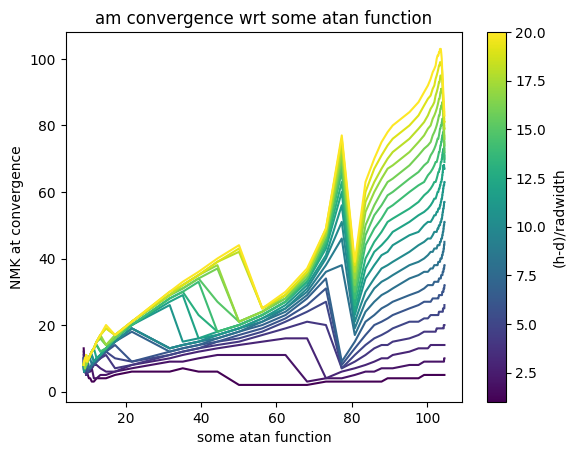

In [15]:
# Try to flatten out the graphs wrt (h-d1)/(h-d0) convergence

def rr_predictor1(data_dict):
  rr = right_uncovered_ratio(data_dict)
  return ((5) * np.atan(20 * (rr - 0.95)) + 9) * 25/4
plot_wrt_one(all_prob_dicts, "am", 0.01, plot_by = "right uncovered ratio", func_pack = {"function" : rr_predictor1, "xlab" : "some atan function"})

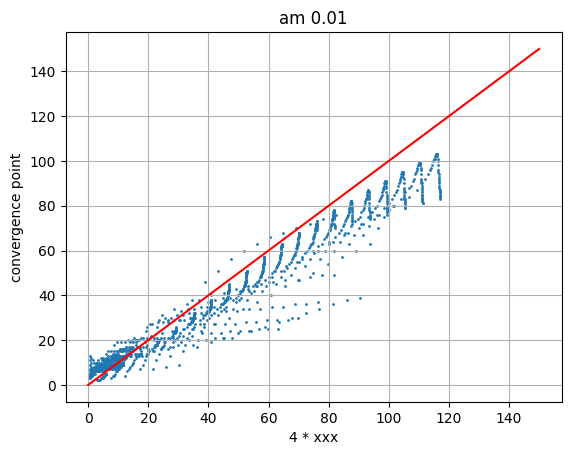

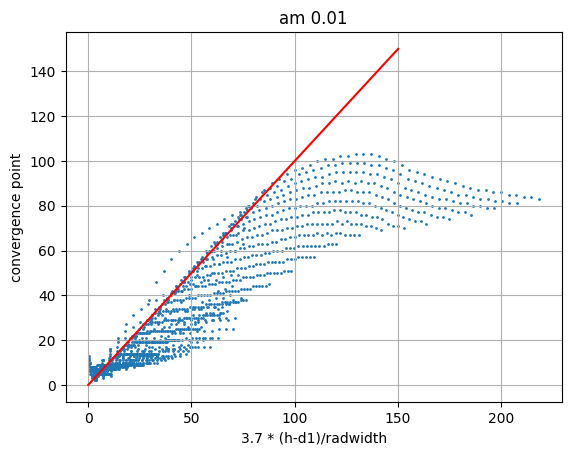

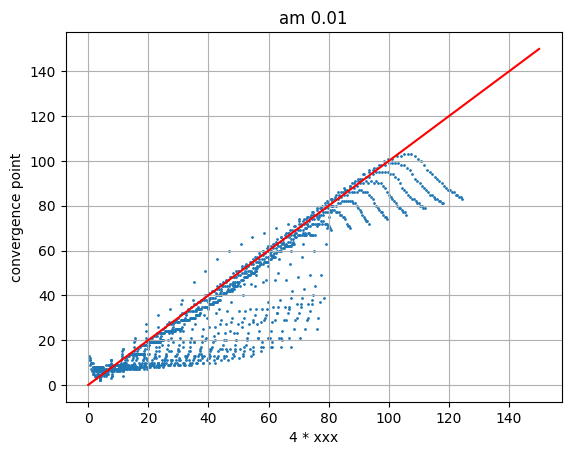

In [16]:
def am_prediction1(data_dict, m0):
  t1 = right_uncovered_ratio(data_dict, over = True)
  t2 = h_minus_d_over_radwidth(data_dict)
  return max(20, (3.7 * t1 * t2))

def am_prediction2(data_dict, m0):
  return 3.7 * (data_dict["h"]-data_dict["d"][1])/data_dict["a"][0]

def am_prediction3(data_dict, m0):
  return 5 * h_minus_d_over_radwidth(data_dict) * np.atan(right_uncovered_ratio(data_dict))

def am_prediction4(data_dict, m0):
  t1 = right_uncovered_ratio(data_dict, over = True)
  t2 = h_minus_d_over_radwidth(data_dict)
  return t2 * ((25) * np.atan(20 * (t1 - 0.95)) + 45) * 0.07

plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction4, "4 * xxx")
plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction2, "3.7 * (h-d1)/radwidth")
# plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction3, "4 * (h-d0)/radwidth")
plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction3, "4 * xxx")

Keeping (h-d)/radwidth and (h-d1)/(h-d) the same, how much does the convergence of the innermost region vary as other dimensions vary?

Fix (h-d)/radwidth and (h-d1)/(h-d) in 4 combinations (extreme or good for each).

In [ ]:
# raw data generation
file3 = "histogram_data_1.pkl"

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [1, 0, 0]
rho = 1023

def populate_d_a2(h, rr, hmdr):
  hmd0 = random.uniform(low = 5., high = (h-5))
  hmd1 = rr * hmd0
  hmd2 = random.uniform(low = 5., high = (h-5))
  radwidth0 = hmd0/hmdr
  radwidth1 = hmd1/random.uniform(low = 1., high = 3.)
  radwidth2 = hmd2/random.uniform(low = 1., high = 3.)
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  return d, a


pairs = [(2, 0.5), (2, 0.99), (20, 0.5), (20, 0.99)]
# fixed_prob_lsts = []

# for pair in pairs:
#   hmdr = pair[0]
#   rr = pair[1]
#   fixed_prob_lst = []
#   for j in range(50):
#     h = random.uniform(low = 10., high = 50.)
#     m0 = random_m0(h)
#     d, a = populate_d_a2(h, rr, hmdr)
#     prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
#     mk = prob.m_k
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 0,
#             "m0s" : [m0]}
#     print(info)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     fixed_prob_lst.append(data_dict)
#   fixed_prob_lsts.append(fixed_prob_lst)
#   update_data_file(fixed_prob_lsts, file2)
#   print("Finished an hmdr-rr pair.")

In [21]:
fixed_prob_lsts = open_pkl_file(file3)
for fixed_prob_lst in fixed_prob_lsts:
  generate_convergence_data(fixed_prob_lst, [0.01, 0.005])
  # Ignoring log data for now.
  # log_data = generate_log_data(fixed_prob_lst)

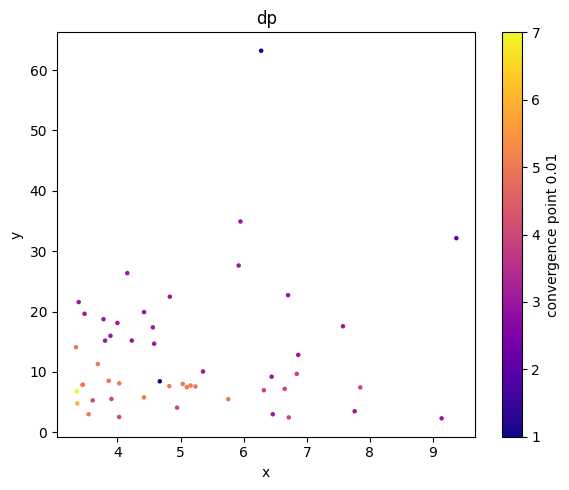

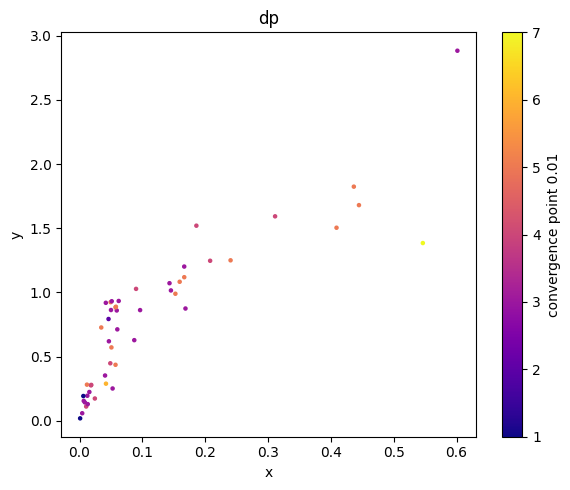

In [22]:
plot_hydros_against_2(fixed_prob_lsts[2], "dp", 0.01,
                      lambda prob, m0 : (prob["a"][1] - (prob["a"][0]))/(prob["a"][0]),
                      lambda prob, m0 : (prob["a"][2] - (prob["a"][1]))/(prob["a"][0]),
                      "x", "y")

plot_hydros_against_2(fixed_prob_lsts[2], "dp", 0.01,
                      lambda prob, m0 :m0/(prob["a"][2] - (prob["a"][0])),
                      lambda prob, m0 : m0,
                      "x", "y")

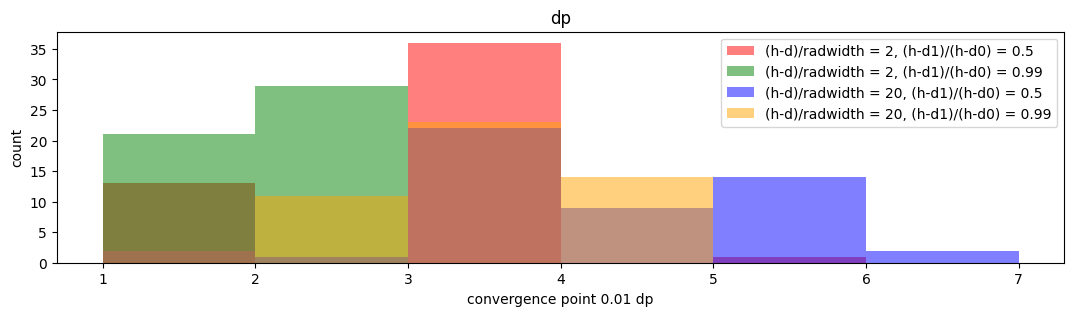

In [ ]:
# Expectation: If the value depends on little else, points for each fixed pair should be clustered around a point, small standard deviation.
# Representation: For each fixed pair, create a histogram (AM).

def histogram(data, hydro, error, ylab = "count", title = "convergence"):
  vals = [data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in data]
  print(vals)
  print(np.arange(min(vals), max(vals)+1, 1))
  plt.hist(vals, bins = np.arange(min(vals), max(vals)+1, 1))
  plt.xlabel(f"convergence point {error:.2g} " + hydro)
  plt.ylabel(ylab)
  plt.title(hydro + " " + title)
  plt.show()

def four_histogram(all_data, hydro, error, labels, ylab = "count", title = None):
  vals_lst = []
  for data in all_data:
    vals_lst.append([data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in data])
  all_vals = np.concatenate(vals_lst)
  bins = (np.arange(min(all_vals), max(all_vals)+1, 1))
  colors = ["Red", "Green", "Blue", "Orange"]
  fig, ax = plt.subplots(figsize=(13, 3))
  for idx, val in enumerate(vals_lst):
    ax.hist(val, bins = bins, color=colors[idx], label = labels[idx], alpha = 0.5, rwidth = 1.0)
  ax.set_xlabel(f"convergence point {error:.2g} " + hydro)
  ax.set_ylabel(ylab)
  if title is None:
    title = hydro
  ax.set_title(title)
  plt.legend()
  plt.show()

hist_labs = [f"(h-d)/radwidth = {pair[0]:.2g}, (h-d1)/(h-d0) = {pair[1]:.2g}" for pair in pairs]

four_histogram(fixed_prob_lsts, "dp", 0.01, hist_labs)

In [ ]:
# Possible phenomenon is that a skinny outermost body region will not shield interior region convergence from an m0 dependence.
# Not explored here, but explore damping.

In [30]:
# Inspect the dependence of radial distance to e-region on damping.
file4 = "predetermined_3.pkl"

# all_prob_dicts = open_pkl_file(file5)
# generate_convergence_data(all_prob_dicts, [0.01, 0.005])

def populate_d_a3(h, hmdr, right_ratio, dist_to_e_region):
  radwidth2, radwidth1 = dist_to_e_region/2, dist_to_e_region/2
  hmd2, hmd1 = radwidth2 * 1.1, radwidth1
  hmd0 = hmd1/right_ratio
  radwidth0 = hmd0/hmdr
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(3):
    assert d[i] > 0
  return d, a

def populate_d_a4(h, hmdr, right_ratio, dist_to_e_region):
  # just 2 regions
  hmd0 = 0.2 * h
  hmd1 = hmd0 * right_ratio
  radwidth0 = hmd0/hmdr
  radwidth1 = dist_to_e_region
  hmds = [hmd0, hmd1]
  radwidths = [radwidth0, radwidth1]
  d = [h - hmds[i] for i in range(2)]
  a = [sum(radwidths[:i + 1]) for i in range(2)]
  for i in range(2):
    assert d[i] > 0
  return d, a

def populate_d_a5(h, hmdr, right_ratio, dist_to_e_region):
  # Very similar to previous, but with 3 regions
  hmd0 = 0.2 * h
  hmd1 = hmd0 * right_ratio
  hmd2 = hmd1 * 1.1
  radwidth0 = hmd0/hmdr
  radwidth1 = dist_to_e_region/2
  radwidth2 = dist_to_e_region/2
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(2):
    assert d[i] > 0
  return d, a

def swap_vals(prob, d, a):
  # Avoids mk recomputations.
  prob.d = d
  prob.a = a
  prob.scale = a
  return prob

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [1, 0, 0]
rho = 1023

# Code was varied to generate 3 data sets, all in file4 now
# all_prob_dicts = []
# m0s = list(np.linspace(0.1, 2, 20))
# m0h = 10
# hmdr = 20
# right_ratio = 1.5
# for m0 in m0s:
#   h = m0h/m0
#   hmd1 = 0.2 * h * right_ratio
#   dist_to_e_regions = list(np.linspace(hmd1/3, hmd1, 10))
#   prob = ConvergenceProblemI(h, [3, 2, 1], [1, 2, 3], heaving, NMK, m0, rho)
#   mk = prob.m_k
#   for dist_to_e_region in dist_to_e_regions:
#     d, a = populate_d_a5(h, hmdr, right_ratio, dist_to_e_region)
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 0,
#             "m0s" : [m0]}
#     print(info)
#     swap_vals(prob, d, a)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     all_prob_dicts.append(data_dict)
#   update_data_file(all_prob_dicts, file6)
#   print("Finished an m0.")


[22, 19, 17, 14, 13, 11, 10, 9, 8, 7]
[23, 20, 17, 15, 14, 12, 11, 9, 8, 7]
[17, 15, 14, 12, 11, 10, 8, 8, 7, 6]


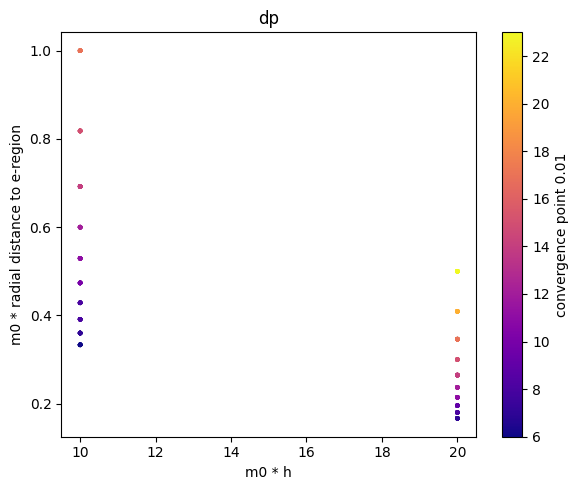

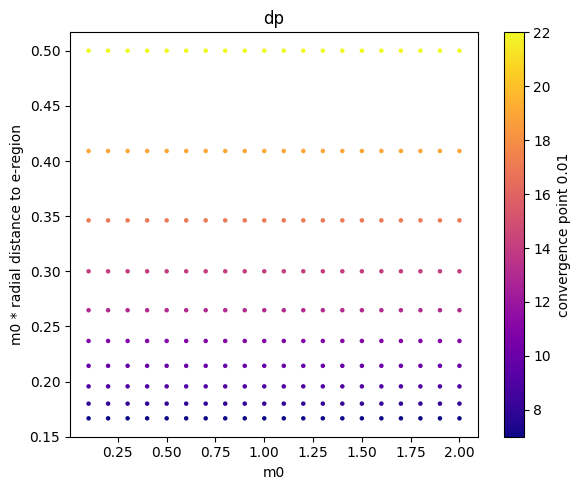

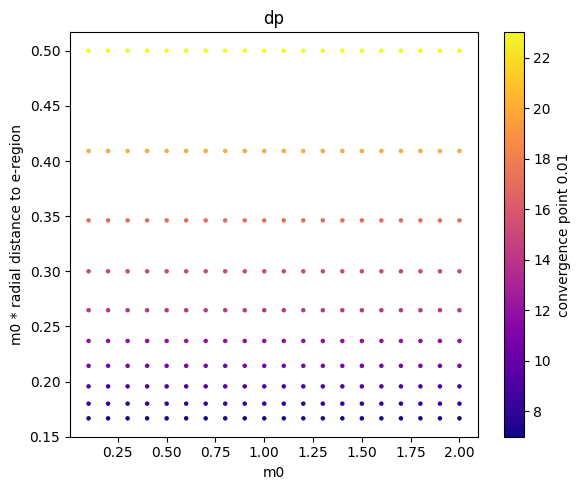

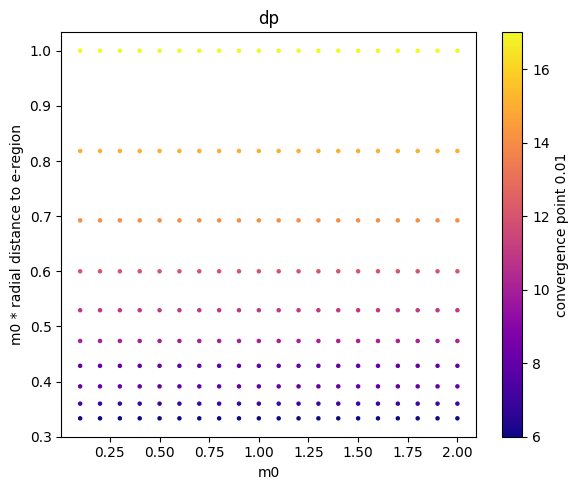

In [33]:
full_sets = open_pkl_file(file4)
for full_set in full_sets: generate_convergence_data(full_set, [0.01, 0.005])
all_subsets = [[prob for prob in full_set if prob["m0s"][0] == 0.1] for full_set in full_sets]
convergence_point_lsts = [[prob[prob["m0s"][0]][f"convergence point 0.01 dp"] for prob in subset] for subset in all_subsets]

for lst in convergence_point_lsts: print(lst)

plot_hydros_against_2((full_sets[1] + full_sets[2]), "dp", 0.01,
                        lambda data_dict, m0 : m0 * data_dict["h"] ,
                        lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                        "m0 * h", "m0 * radial distance to e-region")

for full_set in full_sets:
  plot_hydros_against_2(full_set, "dp", 0.01,
                        lambda data_dict, m0 : m0,
                        lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                        "m0", "m0 * radial distance to e-region")


slope = 2.4, intercept = -4.2, r^2 = 0.99, p = 1.4e-09


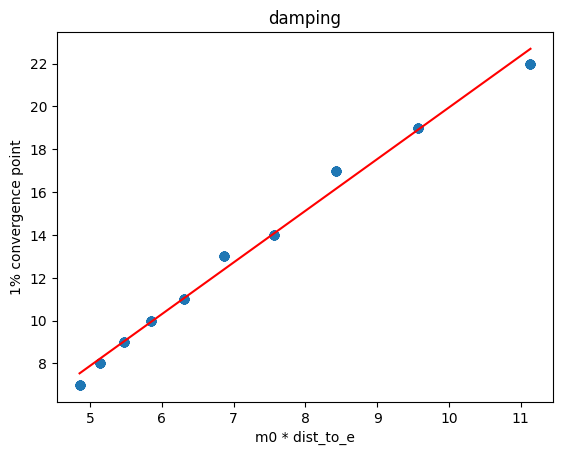

slope = 2.5, intercept = -4.4, r^2 = 0.99, p = 1.2e-08


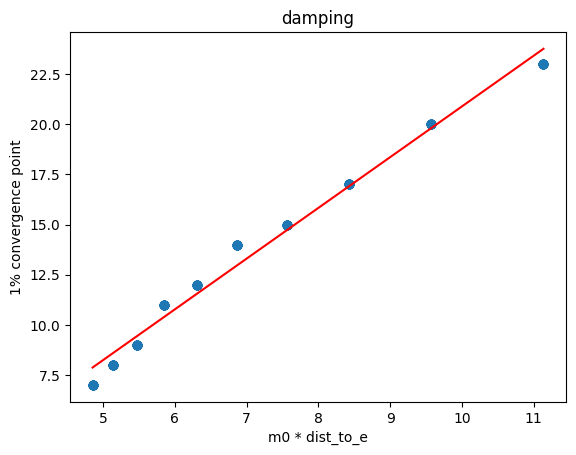

slope = 1.1, intercept = -2.2, r^2 = 0.98, p = 8.8e-08


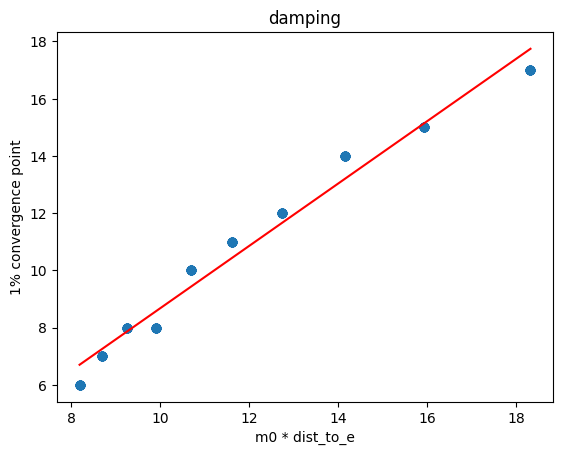

In [34]:
def plot_against_m0_dist_to_e(data, xlab = "m0 * dist_to_e", mod_func = lambda x : x):
  xs, ys = [], []
  lin_xs, lin_ys = [], []
  for data_dict in data:
    for m0 in data_dict["m0s"]:
      x = mod_func(1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])))
      y = data_dict[data_dict["m0s"][0]][f"convergence point 0.01 dp"]
      if not any(math.isclose(xi, x, rel_tol=0.001, abs_tol=0.0) for xi in xs):
        lin_xs.append(x)
        lin_ys.append(y)
      xs.append(x)
      ys.append(y)
  plt.scatter(xs, ys)
  slope, intercept, r_value, p_value, std_err = stats.linregress(lin_xs, lin_ys)
  fit_xs = np.linspace(min(xs), max(xs), 100)
  fit_ys = slope * fit_xs + intercept
  plt.plot(fit_xs, fit_ys, color = "red")
  print(f"slope = {slope:.2g}, intercept = {intercept:.2g}, r^2 = {r_value**2:.2g}, p = {p_value:.2g}")
  plt.xlabel(xlab)
  plt.ylabel("1% convergence point")
  plt.title("damping")
  plt.show()


for full_set in full_sets:
  plot_against_m0_dist_to_e(full_set,
                            mod_func = lambda x : 25 * np.log(x+1) + 1)